General notes:
look into movies that are less expensive. This might be a way to limit capital risk if Microsoft doesn't want to go super hard into the investment. 
look at distribution of the top grossing files. Maybe give them a distribution of files to go for, show which ones will have pretty reliable income and which ones are the longshots but have huge payoff potential. 

imports os and glob
use pd.merge

<h1>
    Mircosoft: Taping into the movie industry
</h1>
<h5>
    Prepared by: Michael Mahoney
</h5>

* Student pace:  part time
* Scheduled project review date/time: 
* Instructor name: James Irving
* Blog post URL:

<h2>
    Introduction:
</h2>
<p>
This notebook marks an initial exploratory investigation of the movie industry on behalf of Microsoft. It contains the technical analysis and source code for which I base my recomendations. A copy of this notebook will be provided in the requested format for future use and/or investigation should Microsoft endeavor to insert themselves in the move market.
</p>
<p>
    There is a liberal use of markdown in this notebook for the purpose of elusidating my thought process during the investigation. In general, comments in the code are reserved for technical python notes and not the methodology of the investigation.
</p>
<br>
<br>

In [1]:
#dependancies in this notebook

from IPython.display import display, Markdown, Latex
import pandas as pd
import datetime
import numpy as np
import matplotlib.pyplot as plt
import requests
import json
import seaborn as sns

In [2]:
pd.set_option('display.max_columns', None)
# pd.set_option('display.max_rows', None)

<h2>
    Exploring the data:
</h2>
<p>
    As with all data analysis, we begin by understanding the data. 
</p>
<br>

In [3]:
#import the files from the local repo
dfBomGross = pd.read_csv('zippedData/bom.movie_gross.csv.gz')
dfimdbName = pd.read_csv('zippedData/imdb.name.basics.csv.gz')
dfimdbTitleBasics = pd.read_csv('zippedData/imdb.title.basics.csv.gz')
dfimdbTitleCrew = pd.read_csv('zippedData/imdb.title.crew.csv.gz')
dfimdbTitlePrincipals = pd.read_csv('zippedData/imdb.title.principals.csv.gz')
dfimdbTitleRatings = pd.read_csv('zippedData/imdb.title.ratings.csv.gz')
dfRtMovie = pd.read_csv('zippedData/rt.movie_info.tsv.gz',sep='\t')
dfRtReviews = pd.read_csv('zippedData/rt.reviews.tsv.gz',sep='\t', encoding='latin_1')
dfTmbd = pd.read_csv('zippedData/tmdb.movies.csv.gz')
dfTn = pd.read_csv('zippedData/tn.movie_budgets.csv.gz')

#We add column headers to this file which was missing them
dfimdbTitleAkas = pd.read_csv('zippedData/imdb.title.akas.csv.gz')
columns = list(dfimdbTitleAkas.columns)
columns[0] = 'tconst'
dfimdbTitleAkas.columns = columns

#Display first row of all DataFrames to get a first look at the data structures
listOfDfs = [dfBomGross, dfimdbName, dfimdbTitleAkas, dfimdbTitleBasics, dfimdbTitleCrew, dfimdbTitlePrincipals, dfimdbTitleRatings, dfRtMovie, dfRtReviews, dfTmbd, dfTn]
for x in listOfDfs:
    display(x.head(1))
print('\n')

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010


,nconst,primary_name,birth_year,death_year,primary_profession,known_for_titles
0,nm0061671,Mary Ellen Bauder,NaN,NaN,"miscellaneous,production_manager,producer","tt0837562,tt2398241,tt0844471,tt0118553"


,tconst,ordering,title,region,language,types,attributes,is_original_title
0,tt0369610,10,Джурасик свят,BG,bg,NaN,NaN,0.0


,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"


,tconst,directors,writers
0,tt0285252,nm0899854,nm0899854


,tconst,ordering,nconst,category,job,characters
0,tt0111414,1,nm0246005,actor,NaN,"[""The Man""]"


,tconst,averagerating,numvotes
0,tt10356526,8.3,31


,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN


,id,review,rating,fresh,critic,top_critic,publisher,date
0,3,A distinctly gallows take on contemporary fina...,3/5,fresh,PJ Nabarro,0,Patrick Nabarro,"November 10, 2018"


,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788


,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"


<br>
<p>
    We see from the above cell that the various parts of our working data are in disarray in terms for formatting and usefulness. Thinking about our ultimate goal, every business centers around the basic premise of profitability (or operational sustainability for those non-profits out there). To that end, any real discussion of how to best enter the movie industry begins with money. Two of our data sources have this information. 
</p>
<br>
<br>

In [4]:
dfTn.info()
dfBomGross.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memor

<br>
<br>
We do a quick check to see if the information overlaps and how well.
<br>
<br>

In [5]:
df2 = dfTn.merge(dfBomGross, how = 'left', left_on='movie', right_on = 'title')
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5782 entries, 0 to 5781
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5782 non-null   int64  
 1   release_date       5782 non-null   object 
 2   movie              5782 non-null   object 
 3   production_budget  5782 non-null   object 
 4   domestic_gross_x   5782 non-null   object 
 5   worldwide_gross    5782 non-null   object 
 6   title              1247 non-null   object 
 7   studio             1246 non-null   object 
 8   domestic_gross_y   1245 non-null   float64
 9   foreign_gross      1086 non-null   object 
 10  year               1247 non-null   float64
dtypes: float64(2), int64(1), object(8)
memory usage: 542.1+ KB


<br>
<br>
    From the info method we see that essentially all the information in dfBomGross is encapsulated by dfTn, therefore we can abandon the join and use dfTn directly. Not to mention dfTn has substantially more accuracy in terms of the numbers themselves. 
   <br>
   <br>

In [6]:
df2 = dfTn.copy()
df2.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


<br>
dfTn does, however, have a substantial amount of formatting issues which we fix in the following cell. 

In [7]:

# convert various columns object data to int data for analysis
df2['domestic_gross'] = [x.replace(',','').replace('$','') for x in df2['domestic_gross']]
df2['domestic_gross'] = df2['domestic_gross'].astype('int64')
df2['worldwide_gross'] = [x.replace(',','').replace('$','') for x in df2['worldwide_gross']]
df2['worldwide_gross'] =df2['worldwide_gross'].astype('int64')
df2['production_budget'] = [x.replace(',','').replace('$','') for x in df2['production_budget']]
df2['production_budget'] =df2['production_budget'].astype('int64')

# Add a new column for profit 
df2['profit'] = (df2['worldwide_gross'] - df2['production_budget'])
df2['profit'] = df2['profit'].astype('float64')
#Change release date to a useable datetime format and add some more columns for easier access
df2['release_date'] = pd.to_datetime(df2['release_date'])
df2['release_year'] = pd.DatetimeIndex(df2['release_date']).year
df2['release_month'] = pd.DatetimeIndex(df2['release_date']).month
df2['release_day'] = pd.DatetimeIndex(df2['release_date']).weekday
# df2 = df2.merge(dfInfo, how = 'left', left_on = 'movie', right_on = 'primary_title')
df2.head(1)

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,profit,release_year,release_month,release_day
0,1,2009-12-18,Avatar,425000000,760507625,2776345279,2.351345e+09,2009,12,4



<br>
<p>
    Looking at this structure, it's clear that joining tables with only financial information isn't going to give much insight as to why movies fiscally perform the way they do. For the sake of saving time later, I'm going to combine all of the IMDB info here and use the names of the movies we do have income information on to sort through the IMDB list which is much more complete in terms of information.
</p>

In [8]:
#check data frame method keys. Use x.columns
# With the exception of dfimdbName, all IMDB dataframes have a common primary key which we use to join them

#The following code changes all 'tconst' columns into a common data type
listOfImdbDfs = [dfimdbTitleAkas,dfimdbTitleBasics,dfimdbTitleCrew,dfimdbTitlePrincipals,dfimdbTitleRatings]
for x in listOfImdbDfs:
    if('tconst' in x.keys()):
        x['tconst'] = x['tconst'].astype('str')

# We define a function to make the joining a little easier
def joinThings(df1, df2):
    df = df1.merge(df2,how='left',left_on='tconst', right_on='tconst')
    return df

# This is still messy and could use some love
df = joinThings(joinThings(joinThings(joinThings(dfimdbTitleAkas,dfimdbTitleBasics),dfimdbTitleCrew),dfimdbTitlePrincipals),dfimdbTitleRatings)
display(df.head(1), df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2841276 entries, 0 to 2841275
Data columns (total 22 columns):
 #   Column             Dtype  
---  ------             -----  
 0   tconst             object 
 1   ordering_x         int64  
 2   title              object 
 3   region             object 
 4   language           object 
 5   types              object 
 6   attributes         object 
 7   is_original_title  float64
 8   primary_title      object 
 9   original_title     object 
 10  start_year         int64  
 11  runtime_minutes    float64
 12  genres             object 
 13  directors          object 
 14  writers            object 
 15  ordering_y         float64
 16  nconst             object 
 17  category           object 
 18  job                object 
 19  characters         object 
 20  averagerating      float64
 21  numvotes           float64
dtypes: float64(5), int64(2), object(15)
memory usage: 498.6+ MB


,tconst,ordering_x,title,region,language,types,attributes,is_original_title,primary_title,original_title,start_year,runtime_minutes,genres,directors,writers,ordering_y,nconst,category,job,characters,averagerating,numvotes
0,tt0369610,10,Джурасик свят,BG,bg,NaN,NaN,0.0,Jurassic World,Jurassic World,2015,124.0,"Action,Adventure,Sci-Fi",nm1119880,"nm0415425,nm0798646,nm1119880,nm2081046,nm0000341",10.0,nm0189777,producer,producer,NaN,7.0,539338.0


None

<br>
<p>
    This information is much more juicy in terms of disecting movie performace. However, there's more work to be done eliminating bad data so we will have something manageable to merge into our financial information. Let's begin by taking a look at which columns or rows we should think about dropping. 
</p>
<br>

In [9]:
#percentage of null values per column
df.isna().sum()/len(df)*100

tconst                0.000000
ordering_x            0.000000
title                 0.000000
region               16.217010
language             86.635406
types                45.353954
attributes           95.215143
is_original_title     0.000880
primary_title         0.000000
original_title        0.000458
start_year            0.000000
runtime_minutes       7.938300
genres                0.864154
directors             0.494531
writers               8.058492
ordering_y            0.034914
nconst                0.034914
category              0.034914
job                  74.427933
characters           61.141156
averagerating        14.711594
numvotes             14.711594
dtype: float64

<br>
<p>
    This informs the following cell in which we dump either incomplete or eteraneous data from df. I want to note at this point that I will not be removing averagerating despite the high percentage of missing data. This is becuase the average rating appears to be at the heart of commercial success and we have enough information to be able to lose .
</p>
<br>

In [10]:
df.drop(columns = ['language', 'types', 'attributes', 'job', 'characters','category', 'ordering_y', 'ordering_x', 'nconst', 'is_original_title', 'region', 'title', 'original_title'], inplace = True)

<br>
<br>
<p>
    A subtle outcome that I want to bring attention to is a standard, but significant, consequence of collapsing dimensional data. Thousands of the rows in the combined IMDB dataframe have been reduced to duplicates which will be shown and removed in the following cell.
</p>
<br>

In [11]:
# We display the shape of the dataframe before and after dropping columns
display(df.shape)
df['duplicated'] = df.duplicated()
df = df.drop(df.loc[df['duplicated']].index)
display(df.shape)

(2841276, 9)

(122302, 10)


<br>
<p>
     Because the very large df dataframe is going to be merged into the much smaller df2 dataframe, it might seem acedemic that we've reduced the df dataframe by 100,000 entries. But this is very important for the joining process which would otherwise be much more likely to have critical and hard to detect errors if the duplicates remained. With those removed, we can go ahead and join this into our financial data
</p>
<br>

In [12]:
listOfNames = [x for x in df2.movie.unique()]
def test(x):
    if x in listOfNames:
        return True
    else:
        return False
df['inDf2'] = df['primary_title'].isin(listOfNames)
dfInfo = df.loc[df['inDf2']]
dfFinal = df2.merge(dfInfo, how = 'left', left_on = 'movie', right_on = 'primary_title')


<br>
<br>
<h2>
    Let's Make Some Pretty (and informative) Graphs
</h2>
<br>
<p>
Looks like we're finally ready to start looking into the data. The first figure is an overview of the profitability of the movie industry throughout history.
</p>
<br><br>

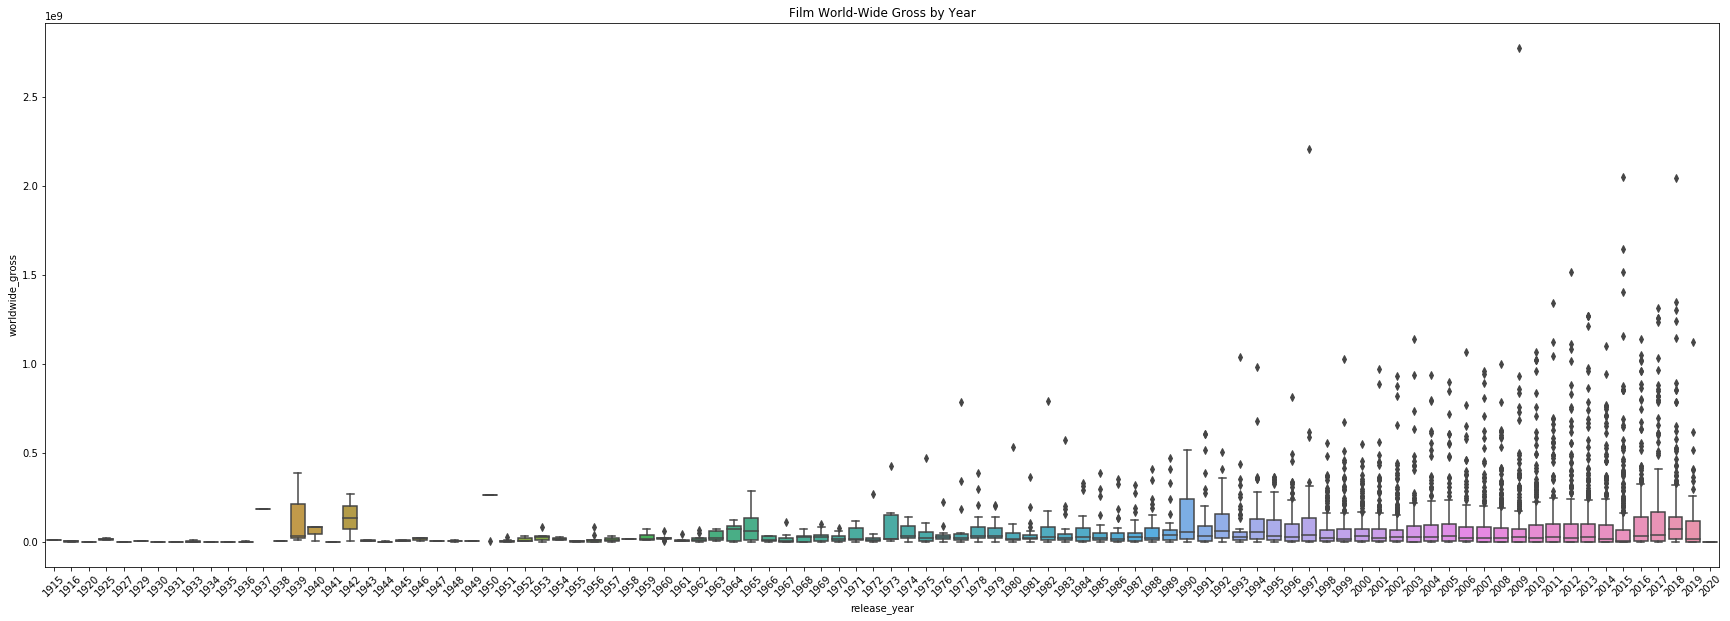

In [13]:
dfFinal.sort_values('release_year',ascending = False, inplace = True)
fig,ax = plt.subplots(figsize = (30,10),
                      ncols = 1, nrows = 1)
x = dfFinal['release_year']
y = dfFinal['worldwide_gross']
ax = sns.boxplot(x = x, y = y);
ax.set_title('Film World-Wide Gross by Year');
ax.set_xticklabels(sorted(x.unique()), rotation =45, fontdict={'horizontalalignment':'center'});

<br>
<br>
<p>
    The general trend appears to be an increase in unadjusted profitability as time increases. It's worth pointing out that at the time of this analysis COVID-19 has decimated the movie industy going into 2020. While the remainder of this notebook will address the profitable historical trends of the industry, <strong>it is highly recomended that Microsoft does not invest substantially in the industry until the long term effects of COVID-19 are made less opaque.</strong>
</p>
<br>


<h3>
    We now begin the process of breaking down what makes a profitable movie. The items presented for investigation are as follows 
</h3>

* Production Budget
* IMBD Average Rating
* Director
* Writers
* Genres

0.6060881813278919

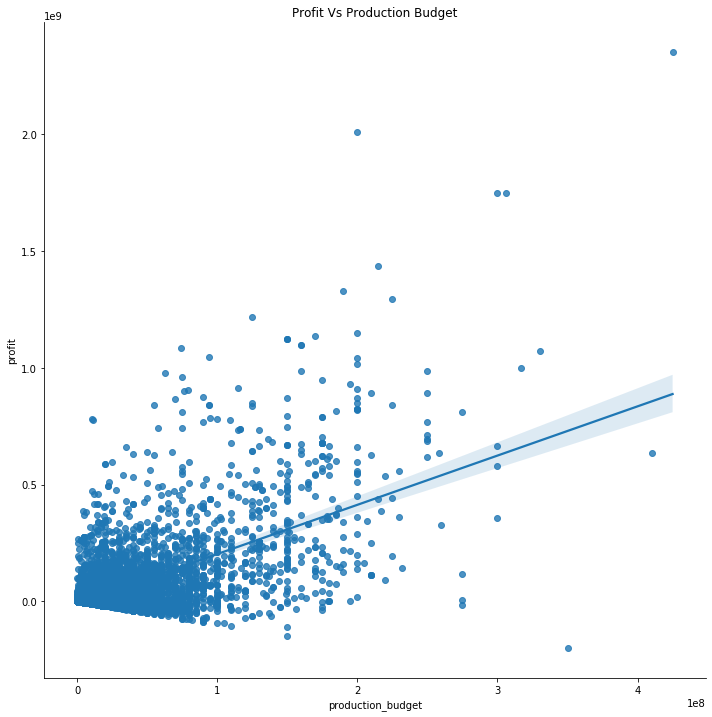

In [14]:
dfFinal.sort_values('profit', ascending=False, inplace = True)
display(np.corrcoef(dfFinal['production_budget'], dfFinal['profit'])[0][1])

sns.lmplot(x = 'production_budget', y ='profit', data = dfFinal, height = 10 );
ax = plt.gca();
ax.set_title("Profit Vs Production Budget");


<p>
    Notice the positive correlation of <strong>0.606</strong>. This is highly significant.
</p>
<br>
<br>



<p>
Here we finally drop the NAN values in the Average rating column in order to examine the IMDB average rating
</p>
<br>


In [15]:
dfFinal['hasRating'] = dfFinal['averagerating'].isna()
dfFinal = dfFinal.drop(dfFinal.loc[dfFinal['hasRating']].index)
dfFinal

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,profit,release_year,release_month,release_day,tconst,primary_title,start_year,runtime_minutes,genres,directors,writers,averagerating,numvotes,duplicated,inDf2,hasRating
0,1,2009-12-18,Avatar,425000000,760507625,2776345279,2.351345e+09,2009,12,4,tt1775309,Avatar,2011.0,93.0,Horror,nm3786927,"nm2179863,nm4392664",6.1,43.0,False,True,False
45,43,1997-12-19,Titanic,200000000,659363944,2208208395,2.008208e+09,1997,12,4,tt2495766,Titanic,2012.0,NaN,Adventure,"nm4430776,nm5410036",nm5410036,6.2,20.0,False,True,False
6,7,2018-04-27,Avengers: Infinity War,300000000,678815482,2048134200,1.748134e+09,2018,4,4,tt4154756,Avengers: Infinity War,2018.0,149.0,"Action,Adventure,Sci-Fi","nm0751577,nm0751648","nm1321655,nm1321656,nm0498278,nm0456158,nm0800...",8.5,670926.0,False,True,False
33,34,2015-06-12,Jurassic World,215000000,652270625,1648854864,1.433855e+09,2015,6,4,tt0369610,Jurassic World,2015.0,124.0,"Action,Adventure,Sci-Fi",nm1119880,"nm0415425,nm0798646,nm1119880,nm2081046,nm0000341",7.0,539338.0,False,True,False
71,67,2015-04-03,Furious 7,190000000,353007020,1518722794,1.328723e+09,2015,4,4,tt2820852,Furious 7,2015.0,137.0,"Action,Crime,Thriller",nm1490123,"nm0604555,nm0860155",7.2,335074.0,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
555,78,2017-04-21,The Promise,90000000,8224288,10551417,-7.944858e+07,2017,4,4,tt7232438,The Promise,2017.0,114.0,"Drama,Horror,Thriller",nm1637163,"nm9188529,nm7628278,nm1637163",6.1,629.0,False,True,False
552,78,2017-04-21,The Promise,90000000,8224288,10551417,-7.944858e+07,2017,4,4,tt6072400,The Promise,2016.0,90.0,Thriller,nm8446571,nm3015321,5.8,8.0,False,True,False
561,80,2017-12-13,Bright,90000000,0,0,-9.000000e+07,2017,12,2,tt5519340,Bright,2017.0,117.0,"Action,Crime,Fantasy",nm0043742,nm0484840,6.4,147834.0,False,True,False
212,94,2011-03-11,Mars Needs Moms,150000000,21392758,39549758,-1.104502e+08,2011,3,4,tt1305591,Mars Needs Moms,2011.0,88.0,"Adventure,Animation,Family",nm0920425,"nm0920425,nm3352441,nm0106455",5.4,19823.0,False,True,False


array([[1.        , 0.16662758],
       [0.16662758, 1.        ]])

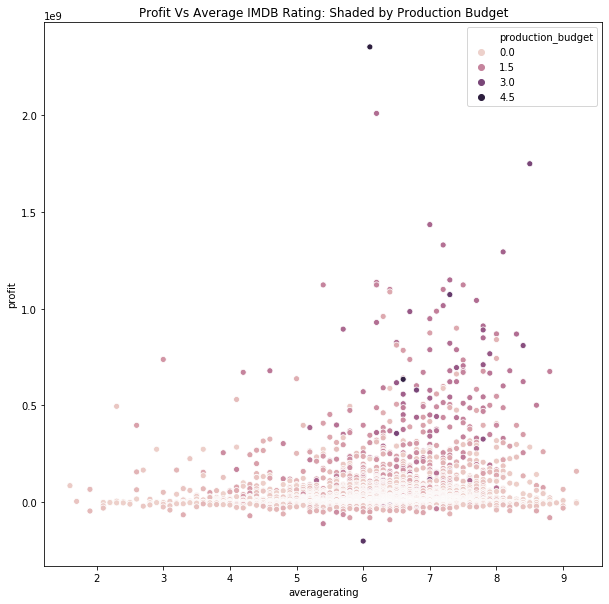

In [16]:
x = dfFinal['averagerating']
y = dfFinal['profit']

display(np.corrcoef(dfFinal['averagerating'], dfFinal['profit']))

fig,ax = plt.subplots(figsize = (10,10),
                      ncols = 1, nrows = 1)
sns.scatterplot(x=x, y=y, hue = dfFinal['production_budget']);
ax = plt.gca()
ax.set_title('Profit Vs Average IMDB Rating: Shaded by Production Budget');
# ax.legend([f"The Correlation is {np.corrcoef(dfFinal['averagerating'], dfFinal['profit'])[0][1]}"])

<br>
<p>
    The connection doesn't appear to be as strong between IMBD rating and profit as it is between production budget and profit. This is something that should be examined in the future. There is a small connection between commercial success and critique rating but it doesn't appear to be striaght forward. For this reason we move on to movie genre to see if there are anymore clearly developed connections. 
</p>
<br>
<br>


In [17]:
#first we are going to re-add some of the info we dropped for the average rating analysis. 
listOfNames = [x for x in df2.movie.unique()]
def test(x):
    if x in listOfNames:
        return True
    else:
        return False
df['inDf2'] = df['primary_title'].isin(listOfNames)
dfInfo = df.loc[df['inDf2']]
dfFinal = df2.merge(dfInfo, how = 'left', left_on = 'movie', right_on = 'primary_title')

In [18]:
#next we are doing something non-standard. Because the genre column contains multiple genres per cell
# we are going to use prime numbers in order to retain this information in an accesible way. 

# We first create a list of primes to assign to our different genres
def isPrime(num):
    test = [num % x != 0 for x in range(2,num)]
    if all(test):
        return num
primes = []   
for x in range(2, 1000):
    if isPrime(x):
        primes.append(isPrime(x))


In [19]:
# find all the unique genres in the genres column
dfFinal['genres'] = dfFinal['genres'].astype('str')

genresList = []
for x in dfFinal['genres']:
    temp = x.lower().strip().split(',')
    for i in temp:
        if i in genresList:
            continue
        else:
            genresList.append(i)
            
# Create a dictionary that assigns primes to each of the unique genres
genresDict = {genresList[i]:primes[i] for i in range(len(genresList))}

# Split the genres column up in order to assign primes
dfFinal['genres'] = [x.strip().lower().split(',') for x in dfFinal['genres']]

# Fuction that multiplies all the primes together
def productFunc(array):
    runningTotal = 1
    for x in array:
        runningTotal = runningTotal*genresDict[x]
    return runningTotal

# Create the genre code column
dfFinal['genresCode'] = [productFunc(x) for x in dfFinal['genres']]  


# http://jonathansoma.com/lede/data-studio/classes/small-multiples/long-explanation-of-using-plt-subplots-to-create-small-multiples/



C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\function_base.py:2526: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\function_base.py:2455: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\function_base.py:2455: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)


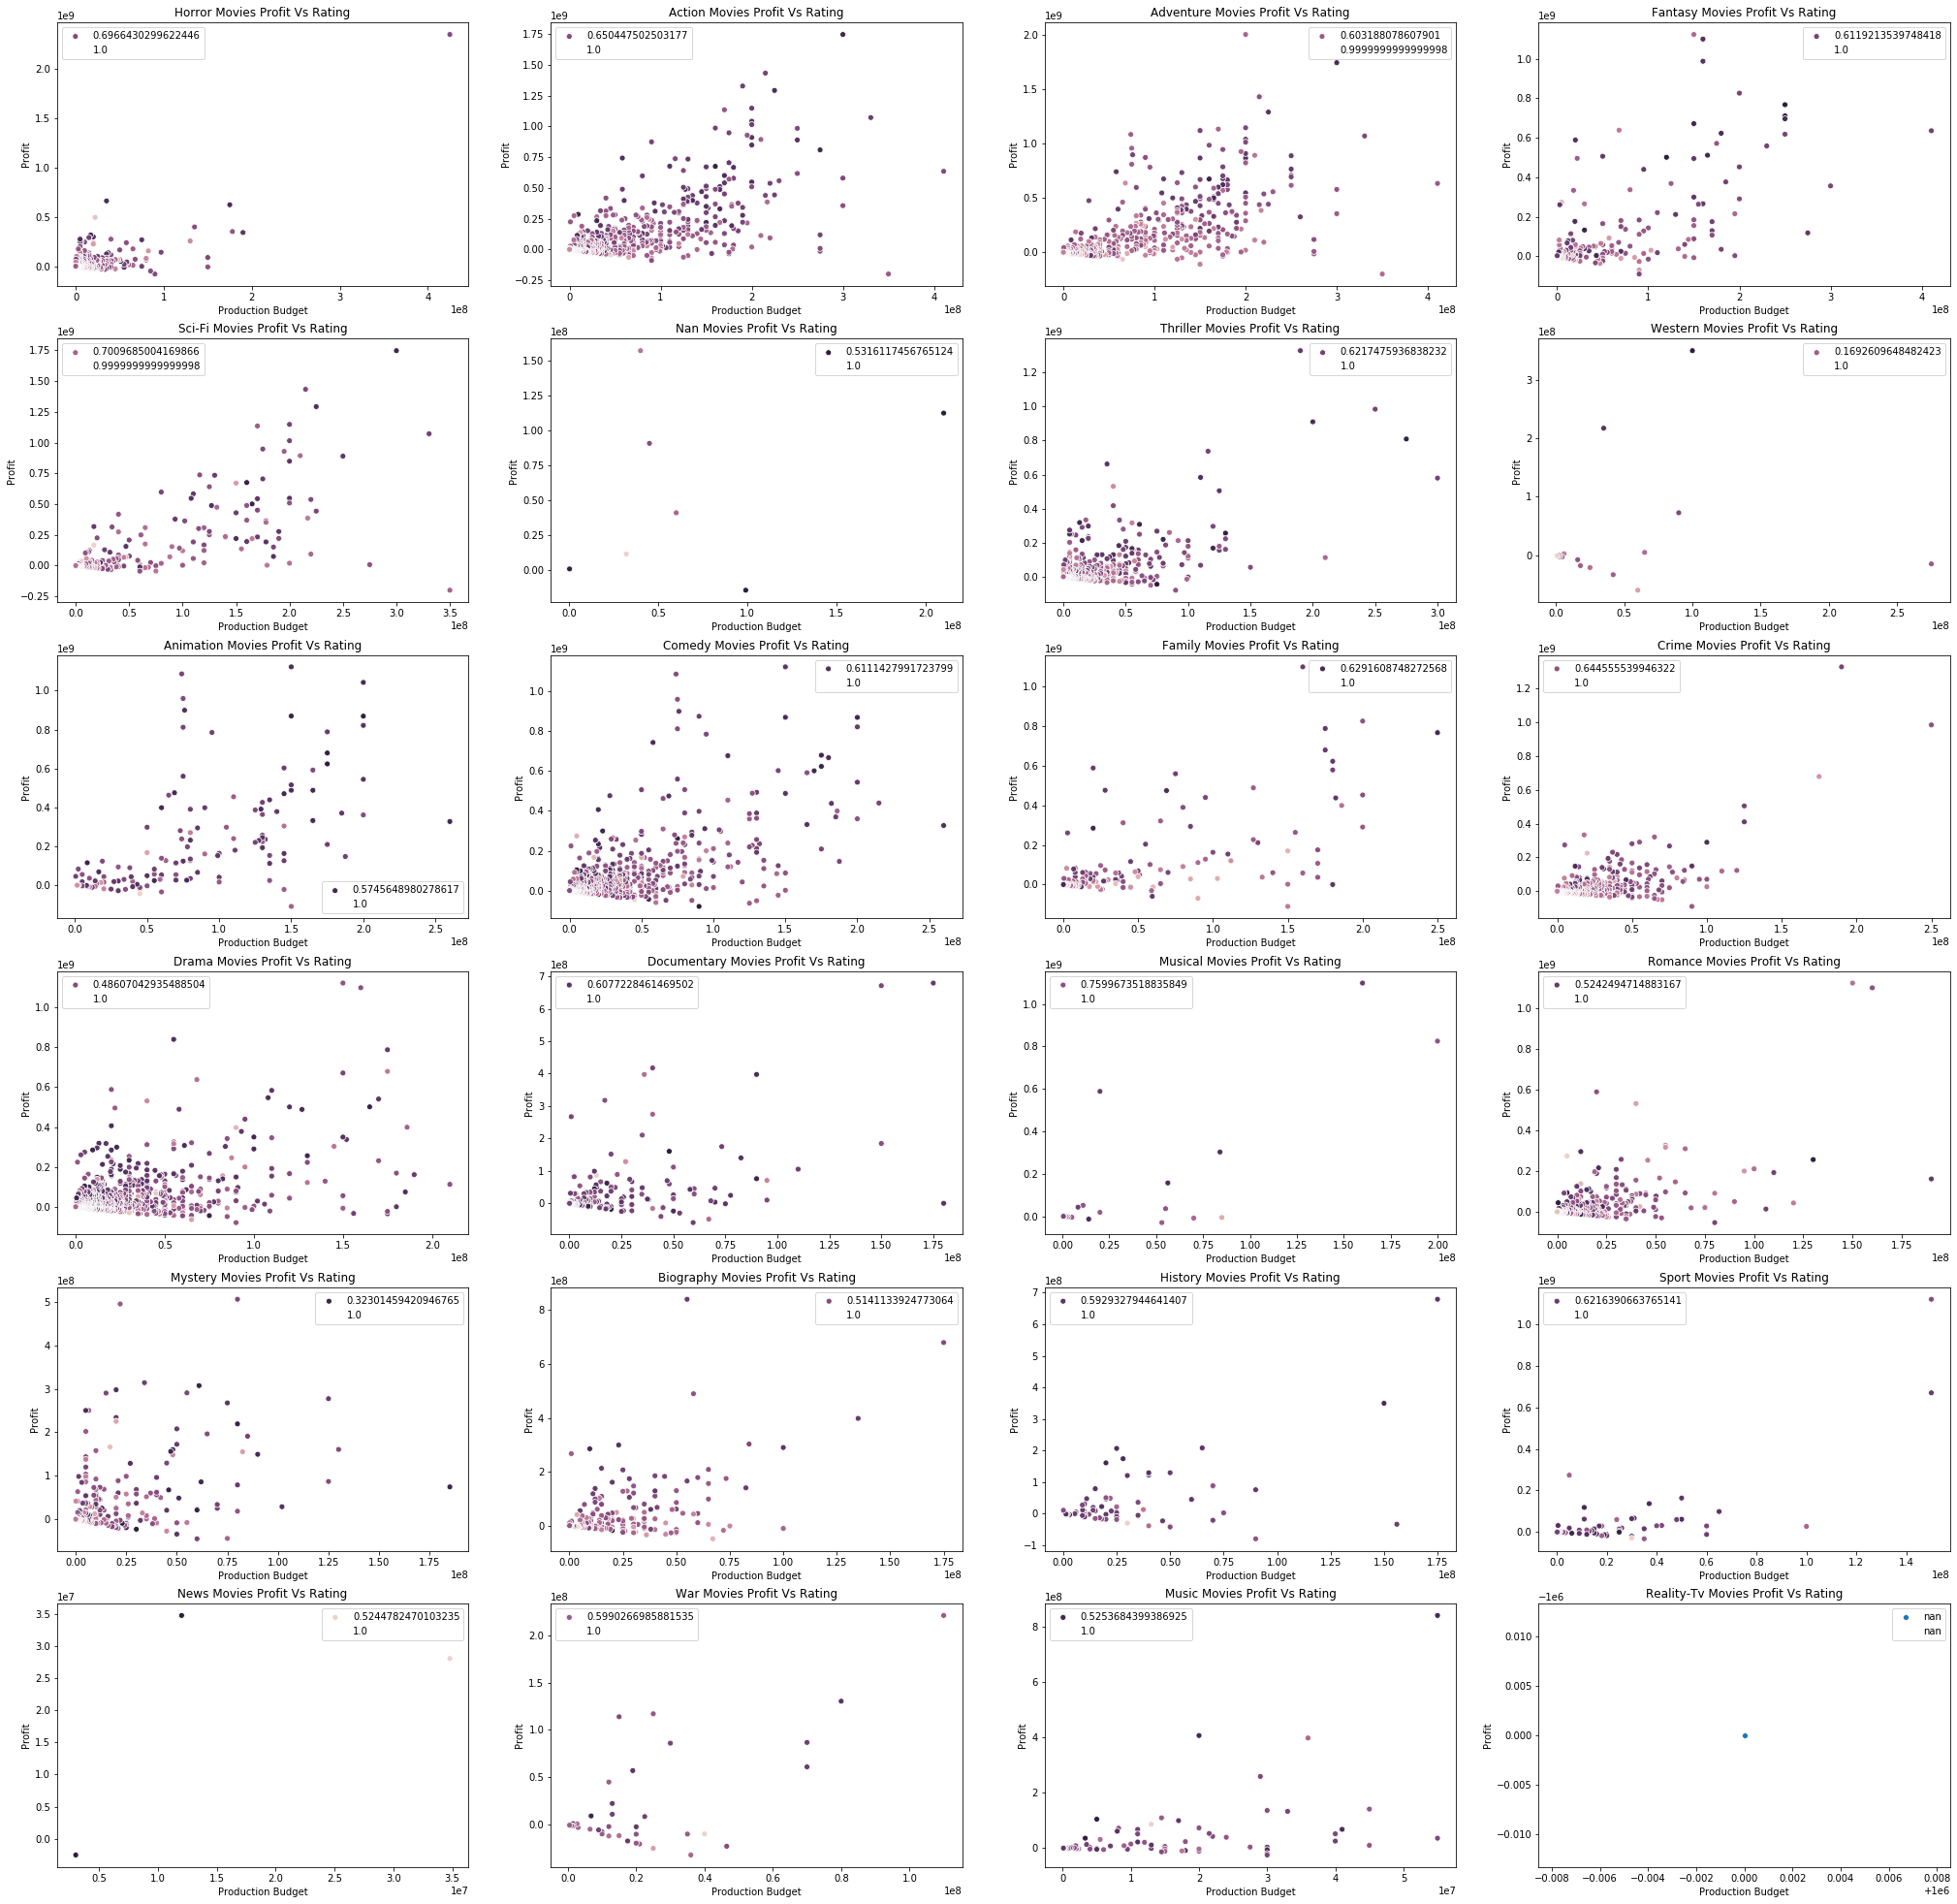

In [20]:
# Defeine a function that create all out plots based on genre
def createAThing(df):
    fig = plt.figure(figsize=(35,35))
    plotnumber = 1
    for i in genresDict.keys():
        df[i] = [(x % genresDict[i] == 0) for x in df['genresCode']];
        x = df.loc[df[i]]['production_budget'];
        y = df.loc[df[i]]['profit'];
        z = df.loc[df[i]]['averagerating']
        
        ax = sns.scatterplot(x, y, ax = plt.subplot(6,4, plotnumber), hue = z);
        ax.set_title(f'{i.title()} Movies Profit Vs Rating')
        ax.set_xlabel('Production Budget')
        ax.set_ylabel('Profit')
        ax.legend(np.corrcoef(x,y)[1])
        plotnumber = plotnumber +1
    
createAThing(dfFinal);

<br>
<p>
    There appear to be several genres that are more commercialy viable. Let's go through and find the directors and writers who make the most profitable movies in each category. 
</p>
<br>
<br>

In [21]:
#get the names of the directors and writers

dfimdbName['isTopDirector'] = dfimdbName['nconst'].isin(dfFinal['directors'])
temp = dfimdbName.loc[dfimdbName['isTopDirector']]
dfFinal = dfFinal.merge(temp, how='left', left_on = 'directors', right_on = 'nconst')


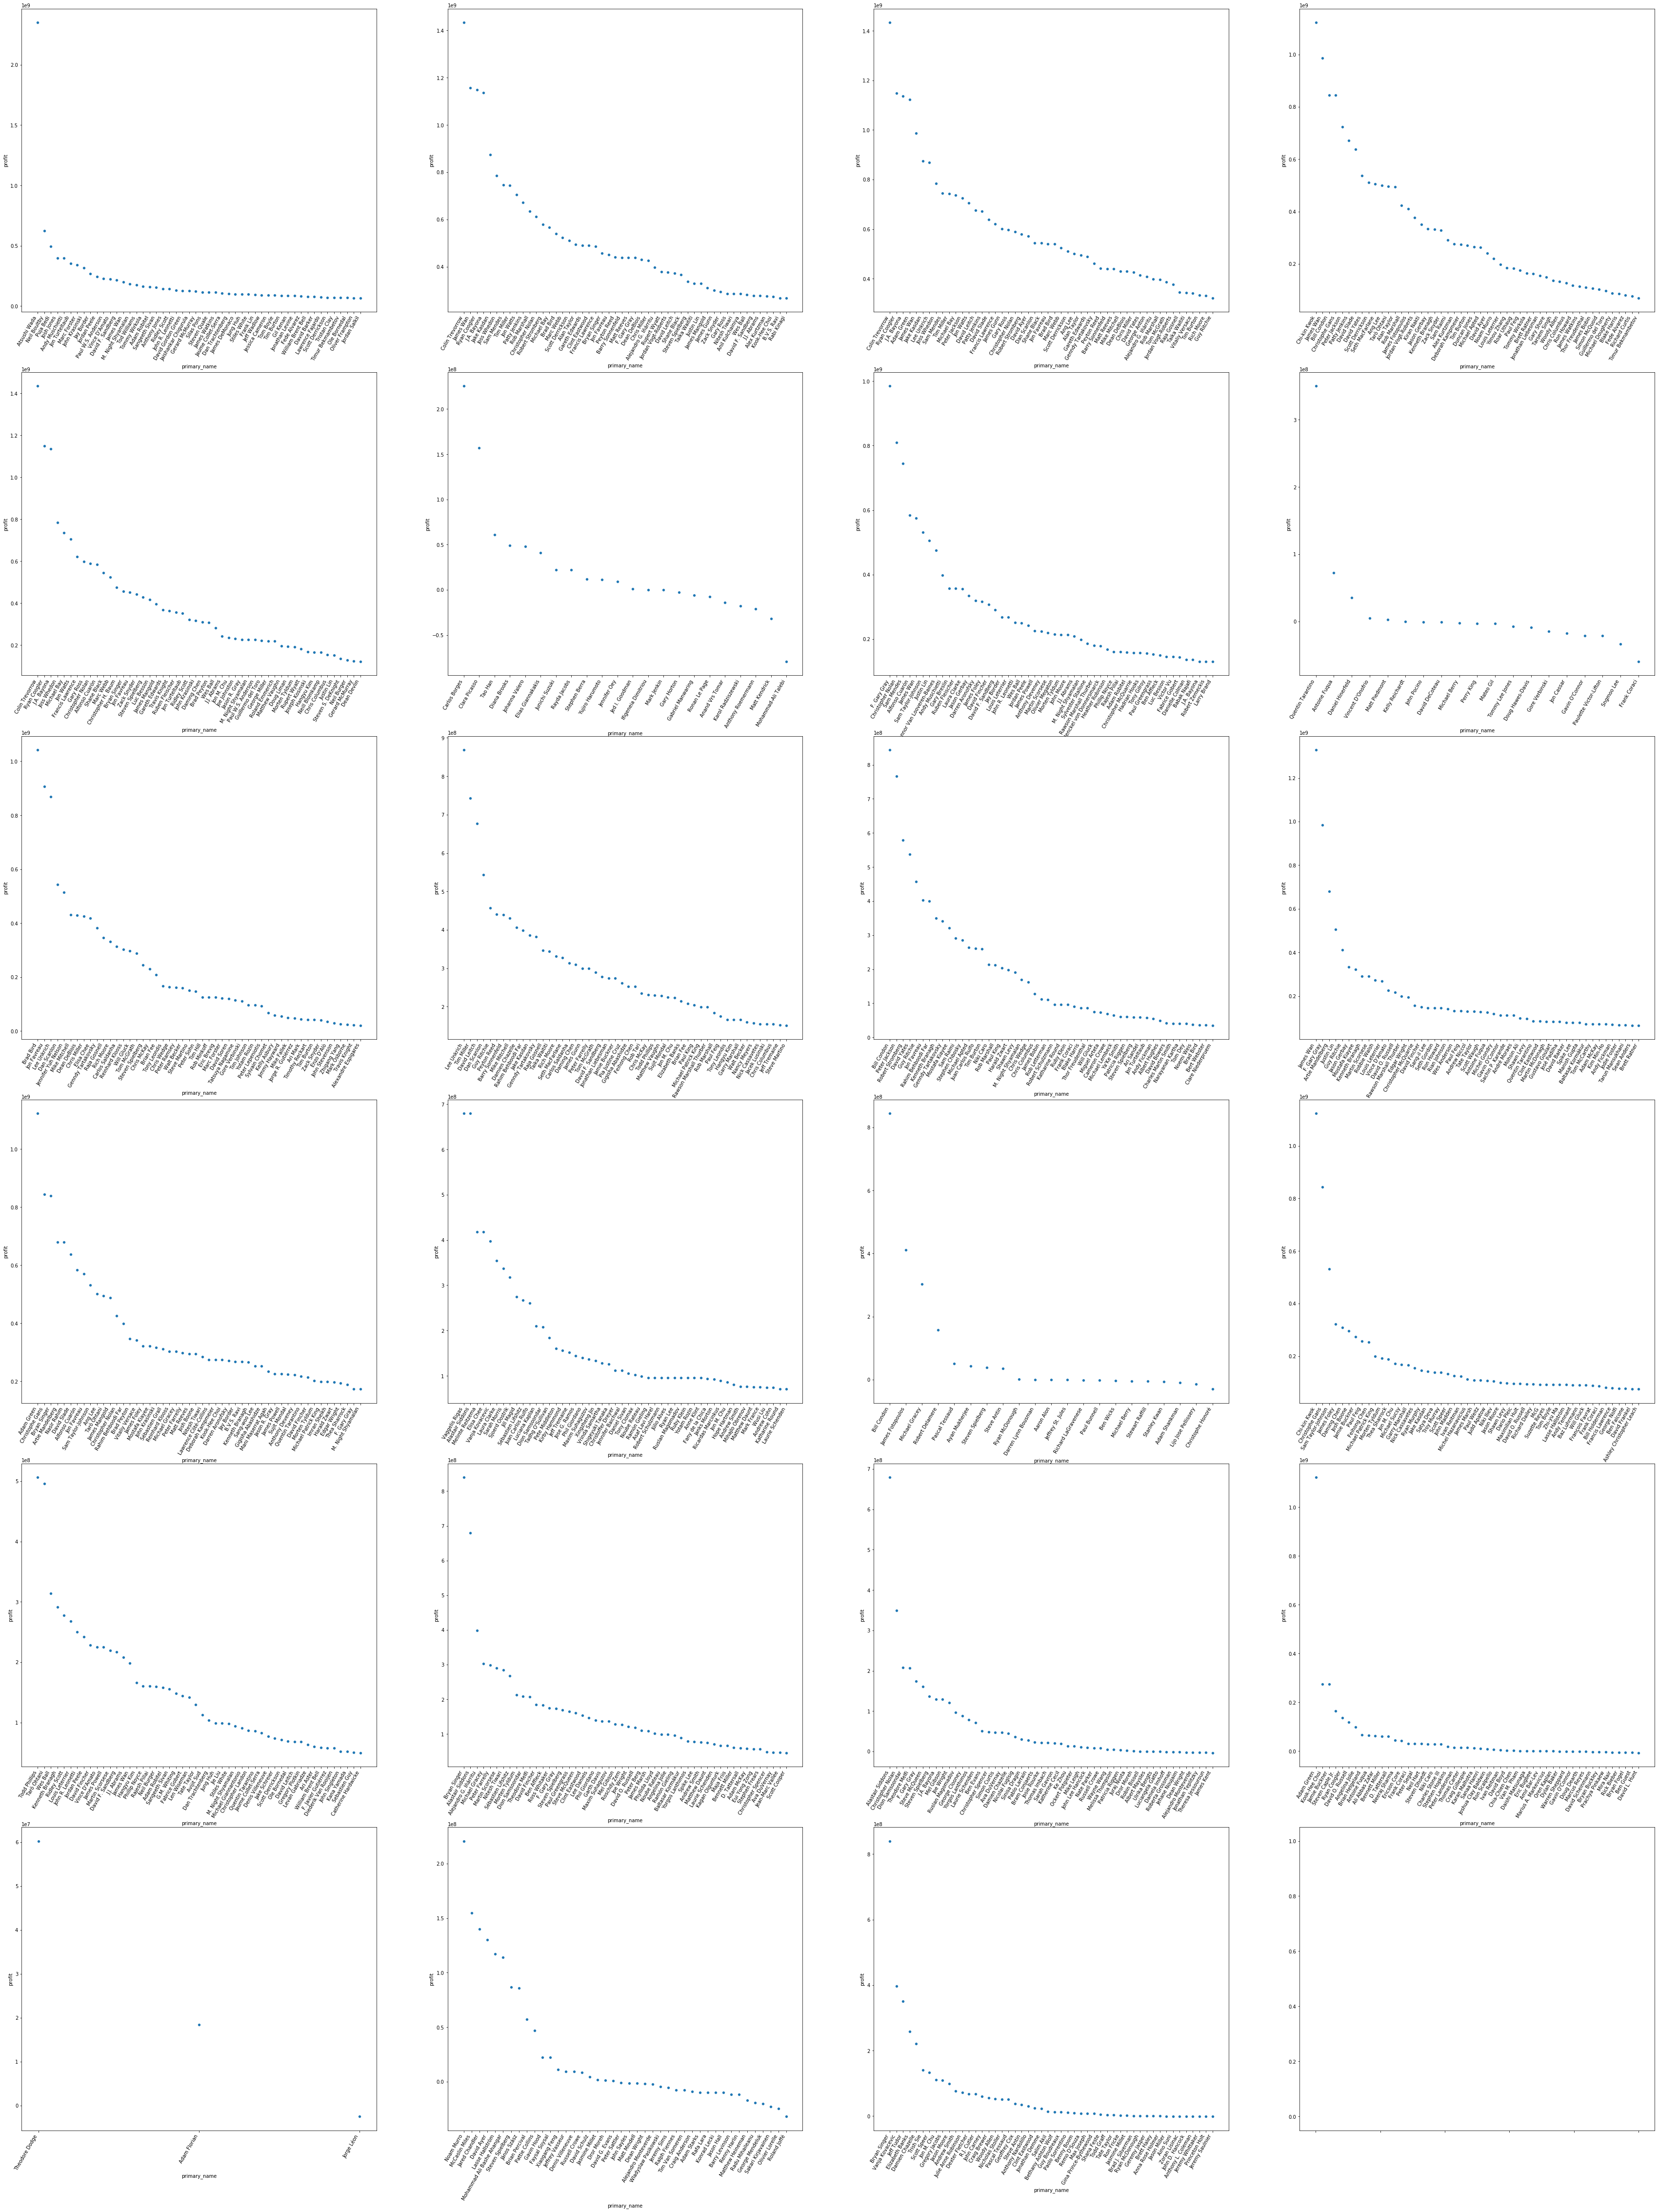

In [46]:
# we break out the top 50 grossing movies and their associated directors in each genre

def createAThing(df, categoryArray):
    plotnumber = 1
    fig,ax = plt.subplots(figsize = (60,80))
    for i in genresDict.keys():        
        x = df.loc[df[i]].groupby('primary_name').mean().sort_values('profit', ascending = False).index[:50]
        y = df.loc[df[i]].groupby('primary_name').mean().sort_values('profit', ascending = False)['profit'][:50]
        ax = sns.scatterplot(x = x, y = y, ax = plt.subplot(6,4,plotnumber))
        ax.set_xticklabels(x, rotation= 60, fontdict={'horizontalalignment':'right'});
        plotnumber = plotnumber +1


createAThing(dfFinal, ['worldwide_gross', 'profit'])

In [ ]:
# createAThing(dfFinal);
def createAThing(df, categoryArray):
    plotnumber = 1
    fig,ax = plt.subplots(figsize = (40,40))
    for i in genresDict.keys():        
        x = df.loc[df[i]].groupby('primary_name').mean().sort_values('profit', ascending = False).index[:50]
        y = df.loc[df[i]].groupby('primary_name').mean().sort_values('profit', ascending = False)['profit'][:50]
        ax = sns.scatterplot(x = x, y = y, ax = plt.subplot(6,4,plotnumber))
        ax.set_xticklabels(x, rotation= 60, fontdict={'horizontalalignment':'right'});
        plotnumber = plotnumber +1


createAThing(dfFinal, ['worldwide_gross', 'profit'])

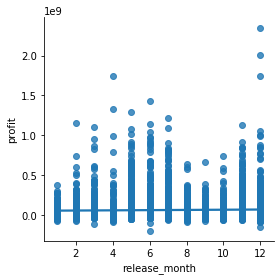

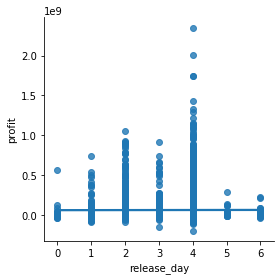

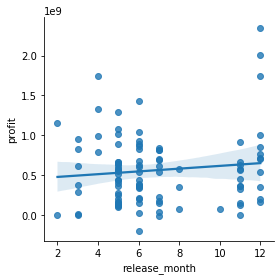

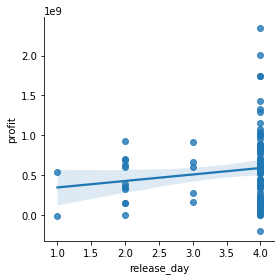

In [43]:
#https://www.interviewqs.com/ddi_code_snippets/extract_month_year_pandas

thing1 = sns.lmplot(x = 'release_month', y ='profit', data = df2, height = 4 )
thing2 = sns.lmplot(x = 'release_day', y ='profit', data = df2, height = 4 )
thing3 = sns.lmplot(x = 'release_month', y ='profit', data = df2[:100], height = 4 )
thing4 = sns.lmplot(x = 'release_day', y ='profit', data = df2[:100], height = 4 )

In [ ]:
# # https://seaborn.pydata.org/examples/multiple_joint_kde.html
# df2 = dfTn.merge(dfBomGross, how = 'left', left_on='movie', right_on = 'title' )

# df2['domestic_gross_x'] = [x.replace(',','').replace('$','') for x in df2['domestic_gross_x']]
# df2['domestic_gross_x'] = df2['domestic_gross_x'].astype('int64')
# df2['worldwide_gross'] = [x.replace(',','').replace('$','') for x in df2['worldwide_gross']]
# df2['worldwide_gross'] =df2['worldwide_gross'].astype('int64')
# df2['production_budget'] = [x.replace(',','').replace('$','') for x in df2['production_budget']]
# df2['production_budget'] =df2['production_budget'].astype('int64')

# df2 = df2.merge(dfInfo, how = 'left', left_on = 'movie', right_on = 'primary_title')
# df2['profit'] = df2['worldwide_gross'] - df2['production_budget']

# df2['genres'] = df2['genres'].astype('str')
# def kdePlotFunc(df,column,categoryArray):
#     fig = plt.figure(figsize=(15,15))
#     plotnumber = 1
#     for i in categoryArray:
#         df[i] = [i in x.lower() for x in df[column]]
#         x = df.loc[df[i]].groupby('averagerating').mean().sort_values('worldwide_gross', ascending=False).index
#         y = df.loc[df[i]].groupby('averagerating').mean().sort_values('worldwide_gross', ascending=False)['worldwide_gross']
#         ax = sns.kdeplot(x, y,shade=True, shade_lowest=False,legend = True,  ax = plt.subplot(3,3,plotnumber))
#         ax.set_title(i)
#         ax.set_yticks([0,200000000, 400000000, 600000000, 800000000, 1000000000])
#         plotnumber = 1+plotnumber
    
# kdePlotFunc(df2,'genres', ['action', 'adventure','fantasy', 'family', 'sci-fi', 'musical', 'music', 'war']);